In [1]:
import os
import sys 
import numpy as np
import plotly.io as pio
import plotly.graph_objs as go


from PIL import Image
from skimage import color
from plotly import subplots


import scipy.misc 
from scipy import io
import matplotlib.pyplot as plt
import pandas as pd




IMG = io.loadmat('teapots.mat')
data = pd.DataFrame(IMG['teapotImages']).to_numpy()
X=data

In [2]:
def plt_original():
    rows = 2
    cols = 5
    axes = []
    count=0
    fig=plt.figure(figsize=(5, 5))
    for a in range(rows*cols): 
        image_sample = data[count,:].reshape(50,38)
        fig = plt.figure()
        fig.suptitle('Image Before Reconstruction ' + str(count))
        plt.imshow(np.rot90(image_sample), origin="lower")
        count+=10
    fig.tight_layout()    
    plt.show()


In [3]:
def standardize(X):
    mu=np.mean(X,axis=0)
    X=X-mu
    std=np.std(X,axis=0)
    Xbar=(X-mu)
    return Xbar,mu,std

In [4]:
def PCA(X, num_components):
    cov = np.cov(X) 
    S = np.round(cov,2)
    eig_vals, eig_vecs = eig(S)
    U = eig_vecs[:, :num_components]
    P = projection_matrix(U) 
    return (P,U)

In [5]:
def eig(S):
    eig_val, eig_vec = np.linalg.eigh(S)  
    sorted_eig  = eig_val.argsort()[::-1]
    eig_val = eig_val[sorted_eig]
    eig_vec = eig_vec[:,sorted_eig]
    return (eig_val, eig_vec)

In [6]:
def projection_matrix(B):
    P = B @ B.T 
    return P

In [7]:
def lse(predict, actual):
    return np.square(predict - actual).sum(axis = 1).mean()

In [8]:
def resconstruction(X):
    reconstructions = []
    max_components = len(X.T)
    projection,U = PCA(Xbar.T, 3)
    reconstructions = Xbar @ projection
    error = lse(reconstructions, Xbar)
    return (reconstructions,error,U)

In [49]:
def plt_eigenvector(): 
    count = 0
    fig=plt.figure(figsize=(5, 5))
    for a in range(0,3):
        fig = plt.figure()
        fig.suptitle('Eigen Vector plot ' + str(count))
        image_sample = U[:,count].reshape(50,38)
        plt.figure()
        plt.imshow(np.rot90(image_sample), origin="lower")
        count+=1
    fig.tight_layout()
    fig.tight_layout()    
    plt.show()


In [50]:
def plt_mean():
    fig=plt.figure(figsize=(5, 5))
    image_sample = mu.reshape(50,38)
    fig = plt.figure()
    fig.suptitle('Plot for mean ')
    plt.imshow(np.rot90(image_sample), origin="lower")
    fig.tight_layout()    
    plt.show()

In [51]:
def plt_PCA():
    images = 10
    fig=plt.figure(figsize=(5, 5))
    num=0
    for a in range(10):
        image_sample = reconstructions[num, :].reshape(50,38)
        fig = plt.figure()
        fig.suptitle('Image After Reconstruction ' + str(num))
        plt.imshow(np.rot90(image_sample), origin="lower")
        num+=10
       
    fig.tight_layout()    
    plt.show()

In [52]:
Xbar,mu,std=standardize(X)


In [53]:
reconstructions,error,U=resconstruction(X)
reconstructions = np.asarray(reconstructions)
reconstructions = reconstructions * std + Xbar
loss = np.asarray(error)


Images for Eigenvector


<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

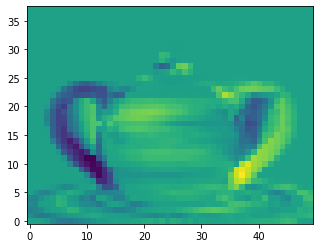

<Figure size 432x288 with 0 Axes>

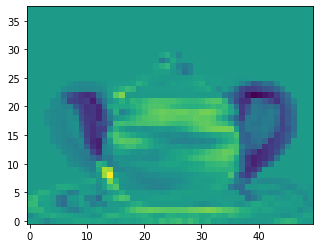

<Figure size 432x288 with 0 Axes>

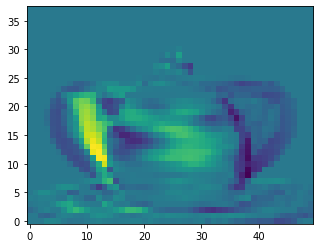

In [54]:
print("Images for Eigenvector")
plt_eigenvector()

Image for Mean


<Figure size 360x360 with 0 Axes>

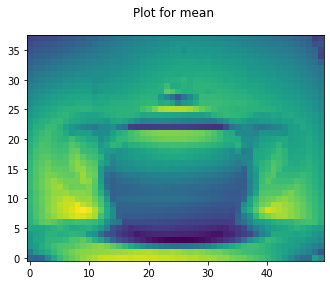

In [55]:

print("Image for Mean")
plt_mean()


Images before reconstruction


<Figure size 360x360 with 0 Axes>

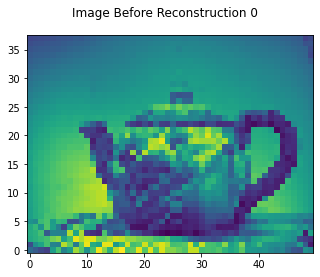

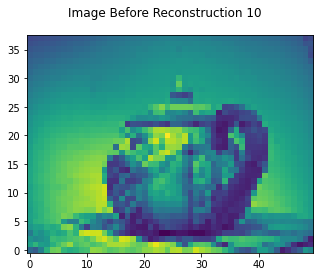

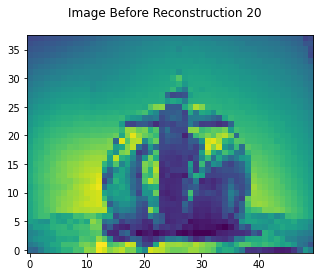

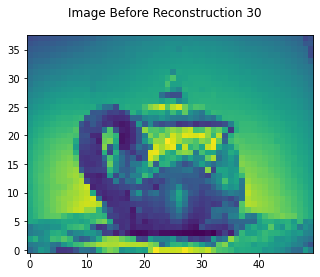

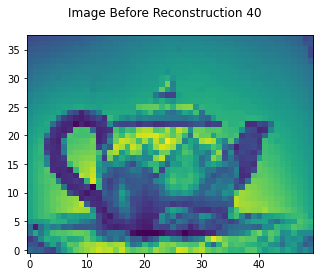

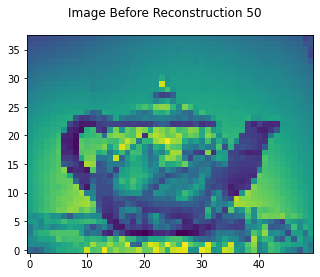

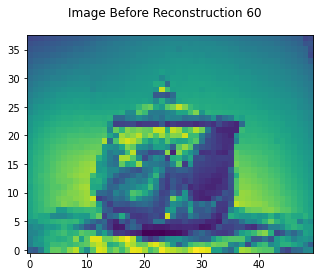

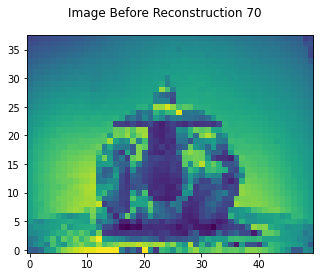

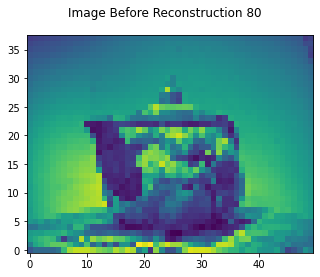

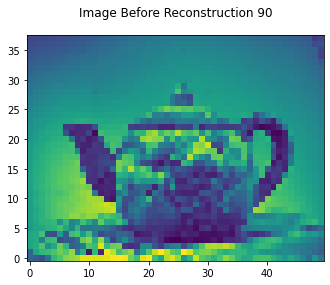

In [56]:
print("Images before reconstruction")
plt_original()


Images after reconstruction


<Figure size 360x360 with 0 Axes>

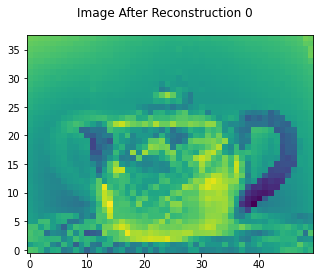

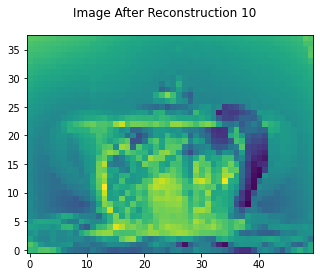

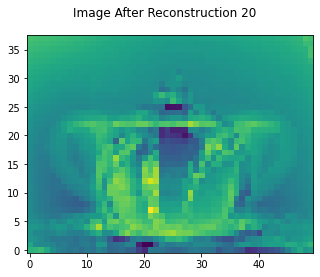

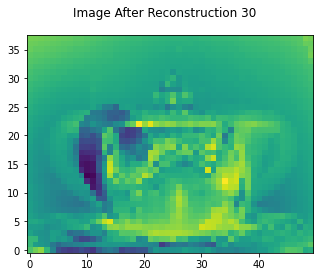

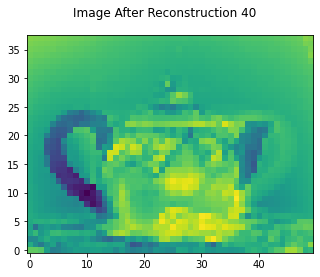

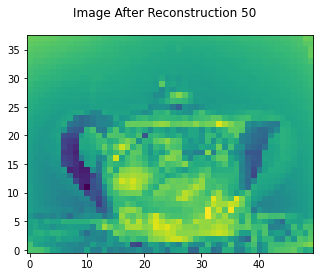

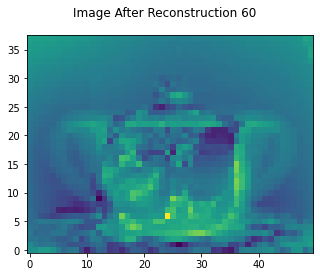

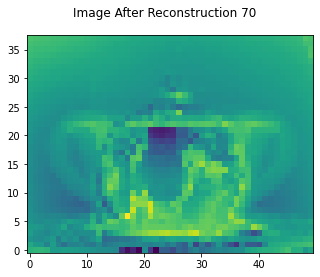

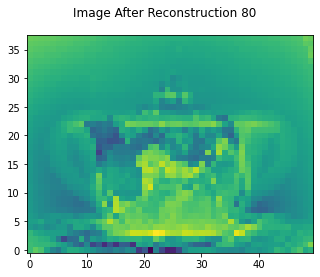

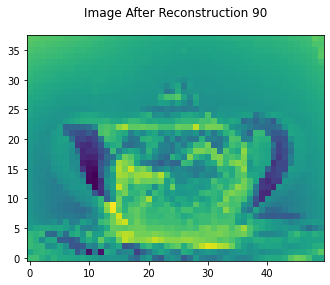

In [57]:
print("Images after reconstruction")
plt_PCA()